In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../..")

## Initialize all variables

In [13]:
from utils.dataset_metadata import DatasetMetadata
from dataset_analysis_scripts.count_files import count_sizes_in_my_dataset
from dataset_analysis_scripts.dataset_counter import DatasetCounter
from static_variables.dataset_variables import CholecInstanceSegVariables
INSTRUMENT_ID_TO_INSTRUMENT_CLASS_DICT = CholecInstanceSegVariables.instrument_id_to_instrument_class_dict

In [14]:
path_to_dataset = 'C:/Users/tal22/Documents/repositories/generate_binary_and_instance_masks_for_cholecseg8k/datasets/final_cholecinstanceseg'
dataset_name = 'cholecinstanceseg'
dataset_style = "dataset_split"
class_names = list(INSTRUMENT_ID_TO_INSTRUMENT_CLASS_DICT.values())

In [6]:
dataset = DatasetMetadata(path_to_dataset=path_to_dataset,
                        dataset_name=dataset_name,
                        dataset_folder_style=dataset_style)
                

all sequences can be found


In [7]:
dataset_metadata = dataset.get_dataset_metadata()

In [15]:
counter_for_cholec_instance_seg =  DatasetCounter(
    path_to_dataset=path_to_dataset,
    dataset_name = dataset_name,
    dataset_style=dataset_style,    
    class_names = class_names,
    )

all sequences can be found


## Count my dataset size

In [16]:
from dataset_analysis_scripts.count_files import count_sizes_in_my_dataset
total_count = count_sizes_in_my_dataset(dataset_metadata)
print(f"Total count images in the dataset: {total_count}")

Entering base data structure
   Entering sub-dictionary key 'test'
      size of seq 'VID07_t80_sparse': 152
      size of seq 'VID09_seg8k': 240
      size of seq 'VID14_t50_full': 1709
      size of seq 'VID15_t50_full': 2059
      size of seq 'VID16_t80_sparse': 99
      size of seq 'VID20_seg8k': 160
      size of seq 'VID21_t80_sparse': 59
      size of seq 'VID22_t50_full': 1533
      size of seq 'VID24_seg8k': 960
      size of seq 'VID29_t50_full': 2351
      size of seq 'VID33_t80_sparse': 59
      size of seq 'VID38_t80_sparse': 103
      size of seq 'VID41_t80_sparse': 104
      size of seq 'VID45_t80_sparse': 113
      size of seq 'VID53_t80_sparse': 110
      size of seq 'VID55_seg8k': 240
      size of seq 'VID58_t80_sparse': 200
      size of seq 'VID61_t80_sparse': 147
      size of seq 'VID64_t80_sparse': 80
      size of seq 'VID69_t80_sparse': 153
      size of seq 'VID72_t80_sparse': 104
      size of seq 'VID77_t80_sparse': 84
   Total count in sub-dictionary at ke

## Get class frequency

In [17]:
dataset_class_frequency = counter_for_cholec_instance_seg.count_class_frequency(aggregation_level='dataset')

In [18]:
dataset_class_frequency

{'grasper': 38144,
 'hook': 19282,
 'irrigator': 2420,
 'clipper': 1324,
 'bipolar': 2558,
 'scissors': 712,
 'snare': 43}

In [19]:
sum(dataset_class_frequency.values())

64483

## plotting class frequency in dataset plot

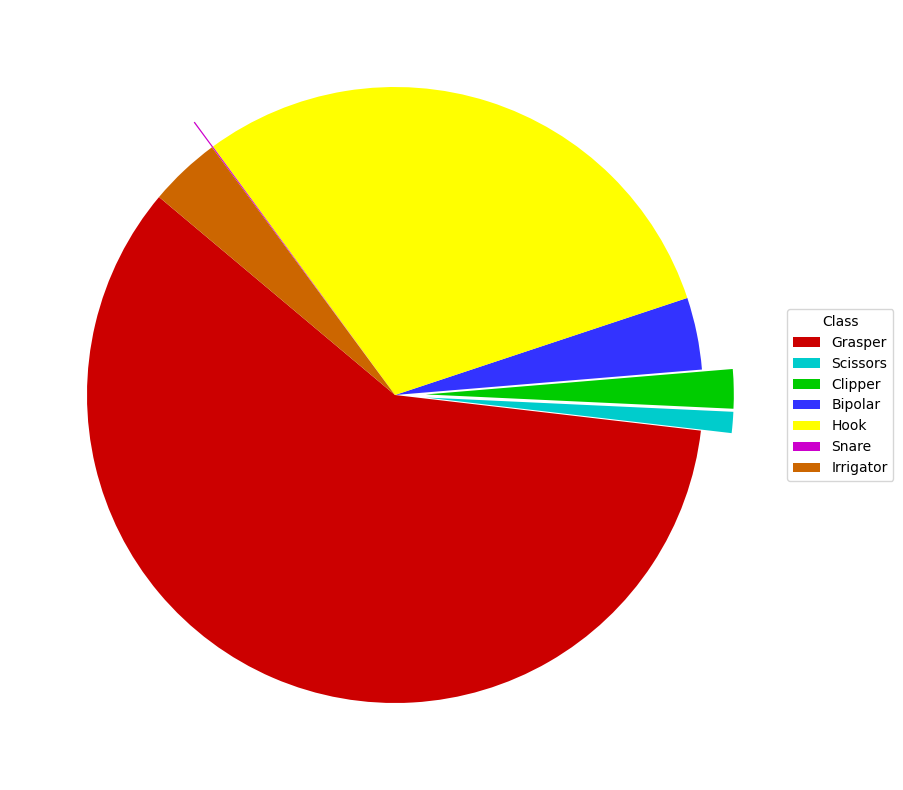

In [21]:
import matplotlib.pyplot as plt

# Data for the instruments
instrument_data = {
    'Grasper': 38144,
    'Scissors': 712,
    'Clipper': 1324,
    'Bipolar': 2437,
    'Hook': 19282,
    'Snare': 43,
    'Irrigator': 2420,
}

# Extracting labels and values
labels = list(instrument_data.keys())
sizes = list(instrument_data.values())

# Specifying colors for each slice
colors = ['#CC0000', '#00CCCC', '#00CC00','#3333FF', '#FFFF00','#CC00CC', '#CC6600']

explode = [0.1 if size < 2000 else 0 for size in sizes]

# Plotting the pie chart
plt.figure(figsize=(10, 8))
wedges, texts = plt.pie(sizes,  colors=colors, explode=explode, startangle=140, wedgeprops={'edgecolor': 'black'})

for i, wedge in enumerate(wedges):
        wedge.set_linewidth(0)  # Example of setting thicker line for specific slices


plt.legend(wedges, labels, title="Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout to minimize space around the pie chart
plt.tight_layout()

# Displaying the chart
plt.show()

## Ploting instance spread informaiton

In [22]:
dataset_sequence_instance_frequency = counter_for_cholec_instance_seg.count_instance_frequency(aggregation_level='image')

In [23]:
frequency = {}
for count in dataset_sequence_instance_frequency.values():
    frequency[count] = frequency.get(count, 0) + 1

In [24]:
frequency

{0: 4914, 1: 14885, 2: 16805, 3: 5328, 4: 1}

In [25]:
sum(frequency.values())

41933

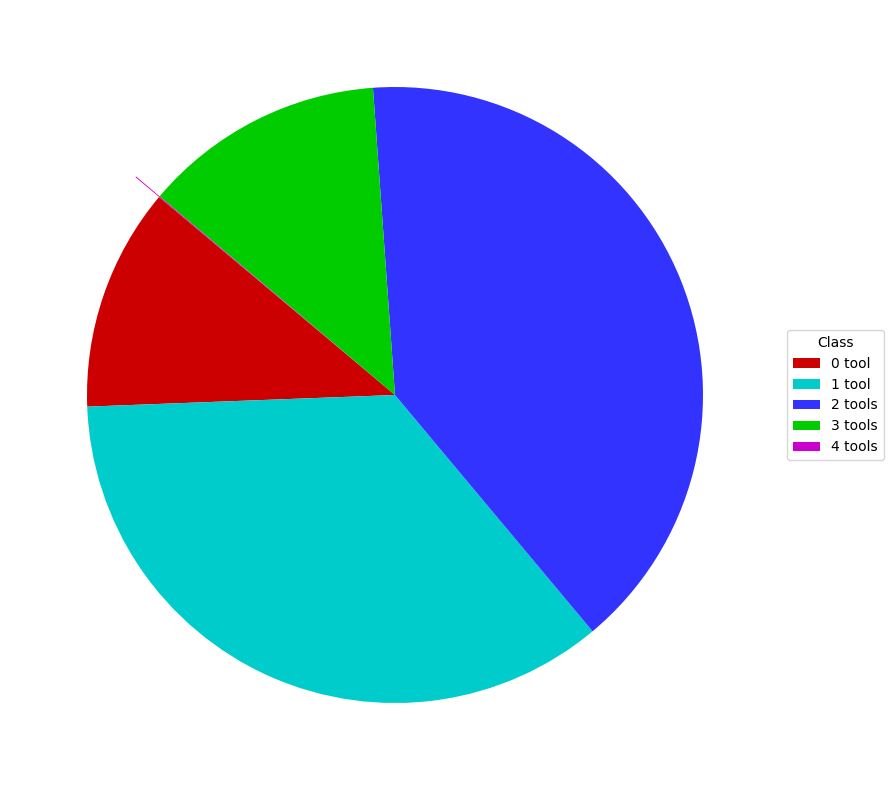

In [27]:
import matplotlib.pyplot as plt

# Data for the instruments
instrument_data = {
    '0 tool': 4914,
    '1 tool': 14885,
    '2 tools': 16805,
    '3 tools': 5328,
    '4 tools': 20,
}

# Extracting labels and values
labels = list(instrument_data.keys())
sizes = list(instrument_data.values())

# Specifying colors for each slice
colors = ['#CC0000', '#00CCCC', '#3333FF', '#00CC00', '#CC00CC']
# '#CC00CC', '#CC6600'

explode = [0.1 if size < 2000 else 0 for size in sizes]

# Plotting the pie chart
plt.figure(figsize=(10, 8))
wedges, texts = plt.pie(sizes,  colors=colors, explode=explode, startangle=140, wedgeprops={'edgecolor': 'black'})

for i, wedge in enumerate(wedges):
        wedge.set_linewidth(0)  # Example of setting thicker line for specific slices


plt.legend(wedges, labels, title="Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout to minimize space around the pie chart
plt.tight_layout()

# Displaying the chart
plt.show()


## Plot ratio of each of the instruments in a sequence.  

In [62]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


In [30]:
dataset_sequence_class_frequency = counter_for_cholec_instance_seg.count_class_frequency(aggregation_level='sequence')

In [33]:
dataset_partition_sequence_class_frequency =  {
    'seg8k' : {},
    't50_full': {},
    't50_sparse': {},
    't80_sparse': {}
}

for seq in dataset_sequence_class_frequency.keys():
    if seq[-5:] == 'seg8k':
        dataset_partition_sequence_class_frequency['seg8k'][seq] = dataset_sequence_class_frequency[seq]
        
    elif seq[-8:] == 't50_full': 
        dataset_partition_sequence_class_frequency['t50_full'][seq] = dataset_sequence_class_frequency[seq]
        
    elif seq[-10:] == 't50_sparse':
        dataset_partition_sequence_class_frequency['t50_sparse'][seq] = dataset_sequence_class_frequency[seq] 
    
    elif seq[-10:] == 't80_sparse':
        dataset_partition_sequence_class_frequency['t80_sparse'][seq] = dataset_sequence_class_frequency[seq]      
           
    

In [ ]:
instrument_data = {
    'Grasper': 38144,
    'Hook': 19282,
    'Irrigator': 2420,
    'Clipper': 1324,
    'Bipolar': 2437,
    'Scissors': 712,
    
    
    
    'Snare': 43,
    
}
colors = ['#CC0000', '#FFFF00', '#CC6600', '#00CCCC', '#00CC00',  '#3333FF','#CC00CC' ]

In [34]:
dataset_partition_sequence_class_frequency

{'seg8k': {'VID09_seg8k': {'grasper': 0,
   'hook': 0,
   'irrigator': 0,
   'clipper': 0,
   'bipolar': 0,
   'scissors': 0,
   'snare': 0},
  'VID20_seg8k': {'grasper': 160,
   'hook': 161,
   'irrigator': 0,
   'clipper': 0,
   'bipolar': 0,
   'scissors': 0,
   'snare': 0},
  'VID24_seg8k': {'grasper': 690,
   'hook': 0,
   'irrigator': 0,
   'clipper': 0,
   'bipolar': 0,
   'scissors': 0,
   'snare': 0},
  'VID55_seg8k': {'grasper': 460,
   'hook': 221,
   'irrigator': 0,
   'clipper': 0,
   'bipolar': 0,
   'scissors': 0,
   'snare': 0},
  'VID01_seg8k': {'grasper': 1169,
   'hook': 809,
   'irrigator': 0,
   'clipper': 0,
   'bipolar': 0,
   'scissors': 0,
   'snare': 0},
  'VID12_seg8k': {'grasper': 1058,
   'hook': 447,
   'irrigator': 0,
   'clipper': 0,
   'bipolar': 0,
   'scissors': 0,
   'snare': 0},
  'VID18_seg8k': {'grasper': 160,
   'hook': 161,
   'irrigator': 0,
   'clipper': 0,
   'bipolar': 0,
   'scissors': 0,
   'snare': 0},
  'VID25_seg8k': {'grasper': 552,
  

In [37]:
t80_sparse_partition = dataset_partition_sequence_class_frequency['t80_sparse']

In [54]:
print(instruments)
print(colors)

['grasper', 'hook', 'irrigator', 'clipper', 'bipolar', 'scissors', 'snare']
['#CC0000', '#FFFF00', '#CC6600', '#00CCCC', '#3333FF', '#00CC00', '#CC00CC']


seg8k
{'VID09_seg8k': 0, 'VID26_seg8k': 185, 'VID35_seg8k': 240, 'VID17_seg8k': 240, 'VID48_seg8k': 242, 'VID20_seg8k': 321, 'VID18_seg8k': 321, 'VID27_seg8k': 433, 'VID28_seg8k': 448, 'VID43_seg8k': 502, 'VID25_seg8k': 552, 'VID55_seg8k': 681, 'VID24_seg8k': 690, 'VID37_seg8k': 938, 'VID52_seg8k': 1247, 'VID12_seg8k': 1505, 'VID01_seg8k': 1978}
10523


C:\Users\tal22\AppData\Local\Temp\ipykernel_12856\408311762.py:23: RuntimeWarning: invalid value encountered in divide
  ratios = values / values.sum(axis=1, keepdims=True)


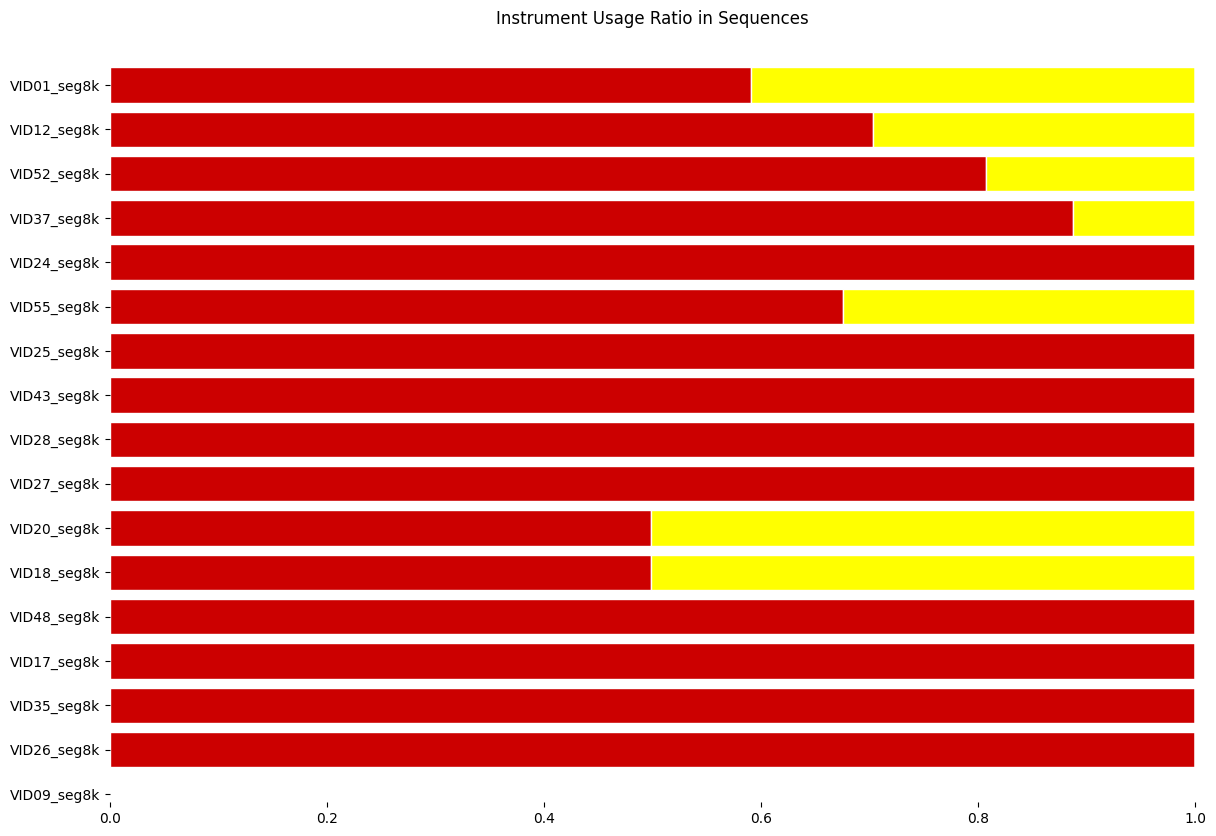

t50_full
{'VID12_t50_full': 1733, 'VID26_t50_full': 2290, 'VID01_t50_full': 2526, 'VID22_t50_full': 2570, 'VID23_t50_full': 2579, 'VID14_t50_full': 2638, 'VID43_t50_full': 2845, 'VID18_t50_full': 2945, 'VID15_t50_full': 3074, 'VID29_t50_full': 3140, 'VID48_t50_full': 3193, 'VID52_t50_full': 3588, 'VID25_t50_full': 3601, 'VID35_t50_full': 4029, 'VID27_t50_full': 4470}
45221


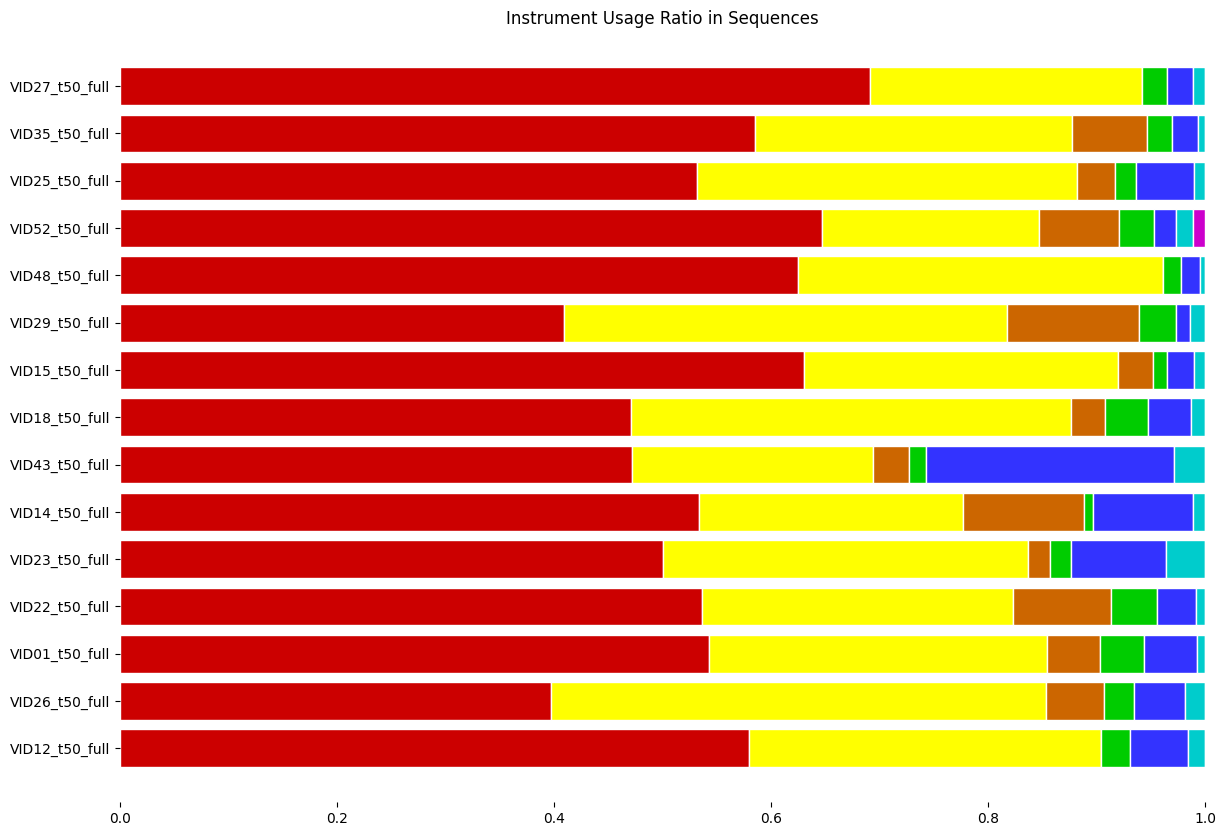

t50_sparse
{'VID96_t50_sparse': 60, 'VID49_t50_sparse': 74, 'VID68_t50_sparse': 79, 'VID80_t50_sparse': 81, 'VID110_t50_sparse': 82, 'VID56_t50_sparse': 83, 'VID04_t50_sparse': 84, 'VID111_t50_sparse': 84, 'VID08_t50_sparse': 85, 'VID75_t50_sparse': 85, 'VID74_t50_sparse': 86, 'VID66_t50_sparse': 90, 'VID78_t50_sparse': 92, 'VID65_t50_sparse': 93, 'VID92_t50_sparse': 96, 'VID62_t50_sparse': 100, 'VID103_t50_sparse': 102, 'VID13_t50_sparse': 103, 'VID36_t50_sparse': 110, 'VID60_t50_sparse': 110, 'VID50_t50_sparse': 112, 'VID40_t50_sparse': 113, 'VID47_t50_sparse': 117, 'VID10_t50_sparse': 122, 'VID70_t50_sparse': 124, 'VID32_t50_sparse': 125, 'VID57_t50_sparse': 128, 'VID73_t50_sparse': 132, 'VID05_t50_sparse': 136, 'VID51_t50_sparse': 170, 'VID02_t50_sparse': 185, 'VID79_t50_sparse': 195, 'VID42_t50_sparse': 199, 'VID06_t50_sparse': 210, 'VID31_t50_sparse': 251}
4098


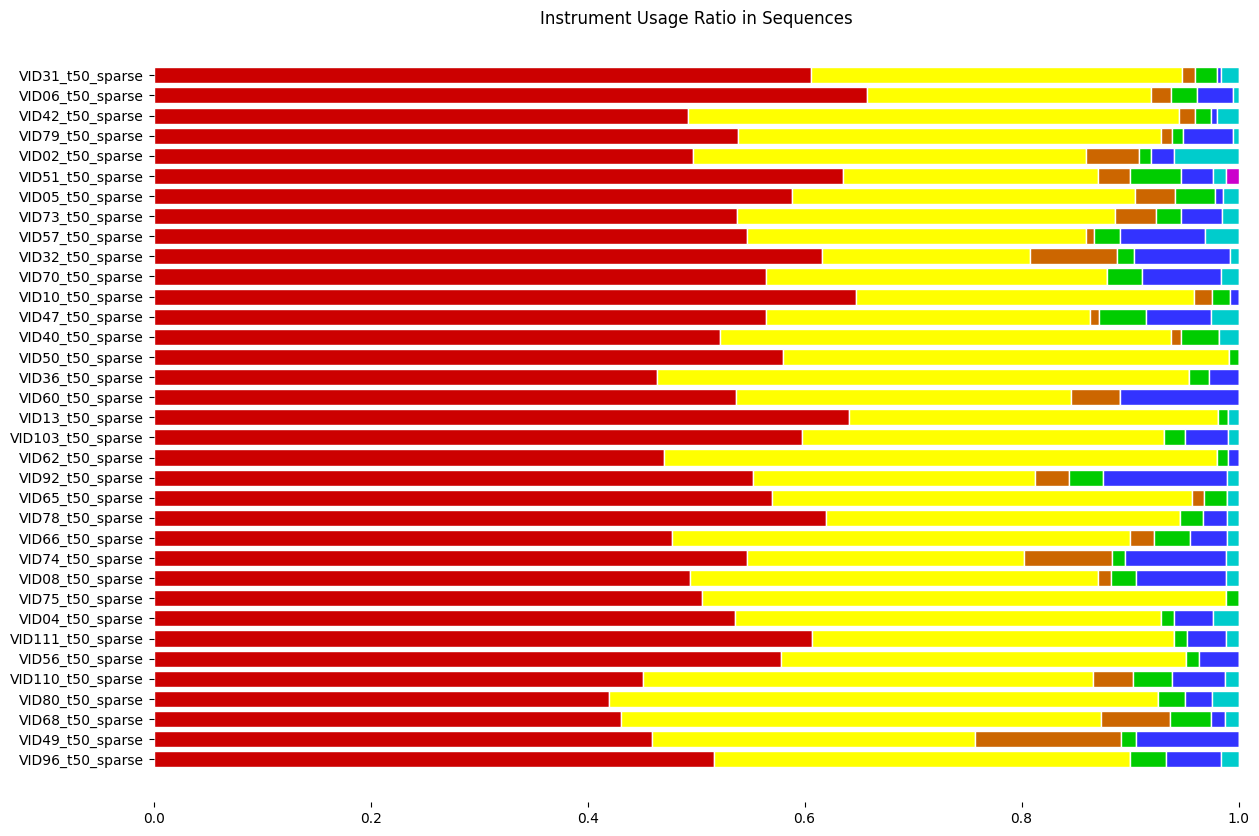

t80_sparse
{'VID21_t80_sparse': 75, 'VID46_t80_sparse': 78, 'VID33_t80_sparse': 84, 'VID34_t80_sparse': 103, 'VID59_t80_sparse': 103, 'VID71_t80_sparse': 103, 'VID39_t80_sparse': 104, 'VID64_t80_sparse': 117, 'VID77_t80_sparse': 138, 'VID76_t80_sparse': 140, 'VID45_t80_sparse': 141, 'VID19_t80_sparse': 149, 'VID30_t80_sparse': 155, 'VID54_t80_sparse': 159, 'VID53_t80_sparse': 160, 'VID16_t80_sparse': 161, 'VID67_t80_sparse': 165, 'VID38_t80_sparse': 170, 'VID41_t80_sparse': 176, 'VID63_t80_sparse': 176, 'VID11_t80_sparse': 178, 'VID44_t80_sparse': 178, 'VID72_t80_sparse': 202, 'VID61_t80_sparse': 247, 'VID58_t80_sparse': 257, 'VID69_t80_sparse': 281, 'VID07_t80_sparse': 282, 'VID03_t80_sparse': 359}
4641


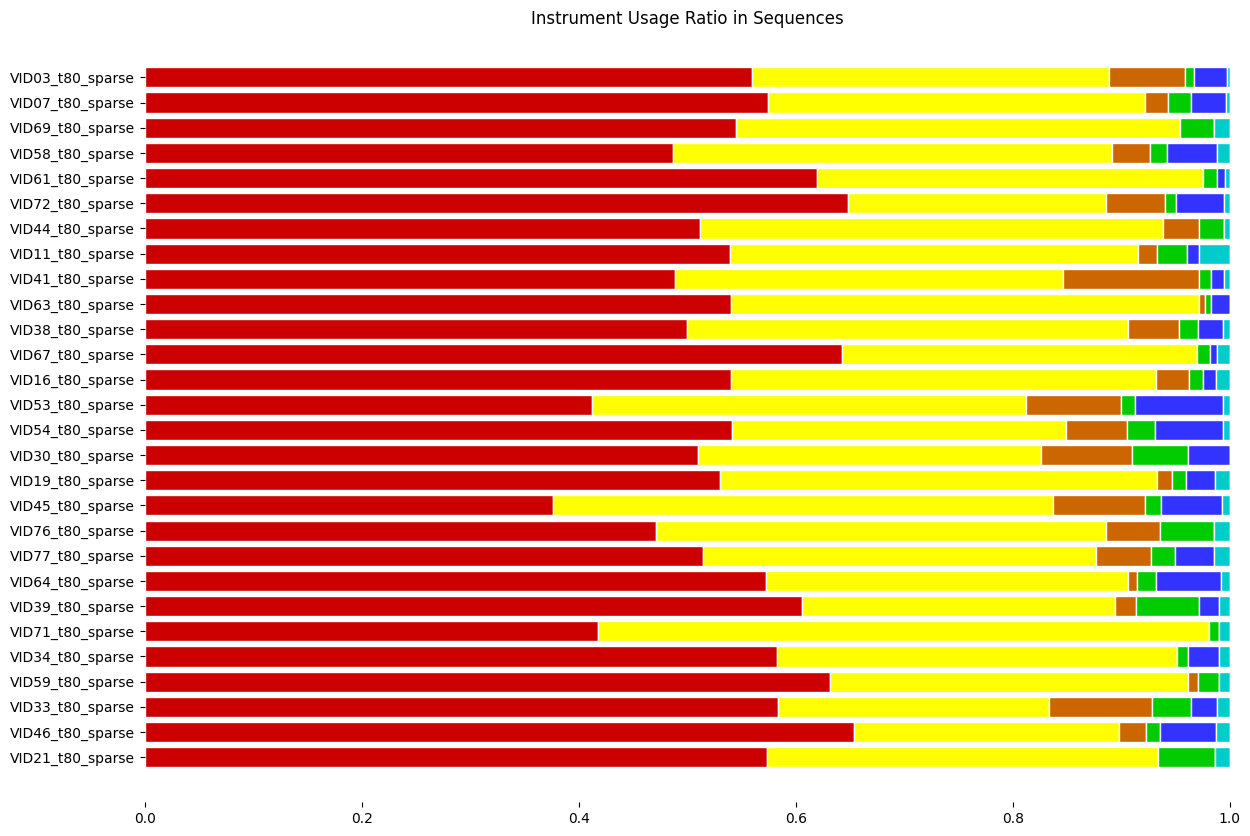

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pprint

# Dataset

for parition, data in dataset_partition_sequence_class_frequency.items():
    
    sum_of_each_seq_dict = {seq: sum(class_dict.values())  for seq, class_dict in  data.items()}
    sum_of_each_seq_dict = dict(sorted(sum_of_each_seq_dict.items(), key=lambda item: item[1]))
    
    print(parition)
    print(sum_of_each_seq_dict)
    print(sum(sum_of_each_seq_dict.values()))

    # Prepare data
    instruments = ['grasper', 'hook', 'irrigator', 'clipper', 'bipolar', 'scissors', 'snare']
    colors      = ['#CC0000', '#FFFF00', '#CC6600', '#00CC00', '#3333FF', '#00CCCC',  '#CC00CC' ]
    sequences = list(data.keys())
    values = np.array([[data[seq][instr] for instr in instruments] for seq in sequences])

    # Normalize data to get ratios
    ratios = values / values.sum(axis=1, keepdims=True)
    
    # Sort sequences by total instrument count
    sorted_indices = np.argsort(values.sum(axis=1))
    sequences = np.array(sequences)[sorted_indices]
    ratios = ratios[sorted_indices]


    # Plot
    fig, ax = plt.subplots(figsize=(14, 10))

    # Colors for each instrument
   

    # Plot each instrument as a bar segment
    bottom = np.zeros(len(sequences))
    for i, instr in enumerate(instruments):
        ax.barh(sequences, ratios[:, i], left=bottom, color=colors[i], edgecolor='white', label=instr)
        bottom += ratios[:, i]

    # Add legend
    # ax.legend(title='Instruments')

    # Add labels
    # ax.set_xlabel('Ratio')
    # ax.set_ylabel('Sequences')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title('Instrument Usage Ratio in Sequences')

    # Display the chart
    plt.show()
